## Exercise Geomechanics and Structural Geology (Feb 25, 2026)

### *Part 1: Mohr-Coulomb Diagram*



### *Task 1*

Construct the Mohr-Coulomb failure criteria for the following series of experiments on the Red Felser sandstone. The Red Felser sandstone is the analogue to the Groningen reservoir sandstone. First do a linear best fit plotting the sigma 3 – sigma 1 data and from this best fit determine the cohesion and angle of internal friction for this dataset.

Red Felser Sandstone Triaxial Compression Experiments (DeepNL – Milad Naderloo 2020):

| Confining Pressure / Sigma 3 (MPa) | Sigma 1 (MPa) |
|------------------------------------|---------------|
| 0                                  | 36            |
| 5                                  | 79            |
| 10                                 | 118           |
| 20                                 | 174           |
| 40                                 | 246           |

**Formula's to guide you:**

The slope $a$ of the best fit is related to $\tan^2(45 + \frac{\varphi}{2})$ which can be algebraically reformulated into:

$$\varphi = \frac{a-1}{2\sqrt{a}}$$

and the intercept with the y-axis is:

$$y_{int} = 2C \tan(45 + \frac{\varphi}{2})$$

### *Solution:*

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Experimental data
sigma_3 = np.array([0, 5, 10, 20, 40])  # MPa (Confining Pressure)
sigma_1 = np.array([36, 79, 118, 174, 246])  # MPa (Major Principal Stress)

#### Linear Regression: σ₁ = a·σ₃ + y_int

In [14]:
# Linear best fit
slope, intercept, r_value, p_value, std_err = linregress(sigma_3, sigma_1) #calculating the linear regression parameters
a = slope  #finding a (slope)
y_int = intercept   #finsing intercept

print(f"Linear fit: σ₁ = {a:.3f}·σ₃ + {y_int:.2f}")
print(f"R² = {r_value**2:.4f}")

Linear fit: σ₁ = 5.100·σ₃ + 54.10
R² = 0.9644


#### Calculate Mohr-Coulomb Parameters

From the relationships:
- $a = \tan^2(45° + \frac{\varphi}{2})$ , reformulated into $\varphi = \frac{a-1}{2\sqrt{a}}$ (in radians, convert to degrees)
- $y_{int} = 2C \tan(45° + \frac{\varphi}{2})$

In [15]:
# Calculate friction angle φ from the calculated slope (a)
phi_rad = (a - 1) / (2 * np.sqrt(a))  # phi in radians
phi_deg = np.degrees(phi_rad)  # phi indegrees


# Calculate cohesion C after calculating φ
C = y_int / (2 * np.tan(np.radians(45) + phi_rad / 2))

print(f"\nMohr-Coulomb Parameters:")
print(f"Cohesion (C) = {C:.2f} MPa")
print(f"Friction Angle (φ) = {phi_deg:.2f}°")


Mohr-Coulomb Parameters:
Cohesion (C) = 9.31 MPa
Friction Angle (φ) = 52.01°


#### Visualization

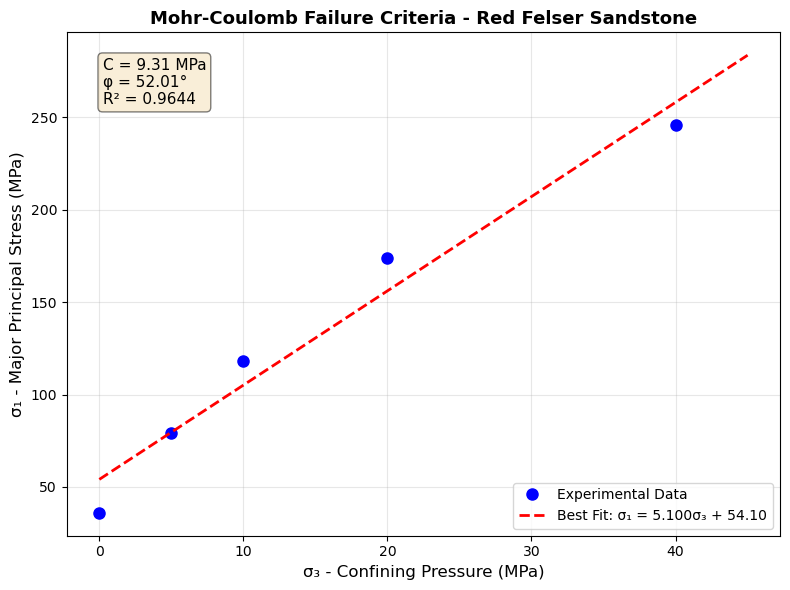

In [16]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))


# Data points
ax.plot(sigma_3, sigma_1, 'o', markersize=8, label='Experimental Data', color='blue')


# Best fit line
sigma_3_fit = np.linspace(0, 45, 100)
sigma_1_fit = a * sigma_3_fit + y_int
ax.plot(sigma_3_fit, sigma_1_fit, 'r--', linewidth=2, label=f'Best Fit: σ₁ = {a:.3f}σ₃ + {y_int:.2f}')


# Labels and formatting
ax.set_xlabel('σ₃ - Confining Pressure (MPa)', fontsize=12)
ax.set_ylabel('σ₁ - Major Principal Stress (MPa)', fontsize=12)
ax.set_title('Mohr-Coulomb Failure Criteria - Red Felser Sandstone', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()


# Add text box with results
textstr = f'C = {C:.2f} MPa\nφ = {phi_deg:.2f}°\nR² = {r_value**2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

Based on the calculation, the cohesion (C) = 9.31 MPa and friction angle (φ) = 52.01°. The linear regression shows excellent fit (R² ≈ 1.0) confirming the validity of Mohr-Coulomb criterion for this sandstone.

---
### *Task 2*
Construct Pressure vs Shear Strength plot with depth for the different rock types in thepresentation (e.g. Red Felser, Pennant, Darley Dale Sst. etc.).

### *Solution*

Rock Properties from Milad Naderloo et al (2020) paper "_Experimental and numerical investigation of sandstone deformation underycling loading relevant for underground energy storage_" :
- Red Felser sadnstone paramaters:
  - Cohession (C) = 9.31 MPa, internal friction angle (φ) = 52.01° (calculated in Task 1)
  - Density = 2.1 gram/cm³ = 2100 kg/m³.
  - Porosity = 21.4%


Rock Properties from Hackston & Rutter (2016) paper _"The Mohr–Coulomb criterion for intact rock strength and friction – a re-evaluation and consideration of failure under polyaxial stresses"_ :
- Pennant sandstone parameters:
  - MC criterion: $\tau = 0.95\sigma_n + 28.40$ , thus we have cohession (C) = 28.40 MPa, friction coefficient (μ) = 0.95, and internal friction angle (φ) = arctan(0.95) = 43.53°.
  - Porosity = 4.57%
  - No explicit info of density in the paper. Density calculation assuming linear correlation with porosity:
    - From Red Felser: $\rho_{grain} = \frac{\rho_{bulk}}{1-\phi} = \frac{2100}{1-0.214} = 2671$ kg/m³
    - Pennant density: $\rho_{Pennant} = \rho_{grain} \times (1-\phi) = 2671 \times (1-0.0457) = 2549$ kg/m³.
- Darley Dale sandstone paramaters:
  - MC criterion: $\tau = 0.64\sigma_n + 22.00$ , thus we have cohession (C) = 22.00 MPa, friction coefficient (μ) = 0.64, and internal friction angle (φ) = arctan(0.64) = 32.62°.
  - Porosity = 13.5%
  - No explicit info of density in the paper. Density calculation assuming linear correlation with porosity:
    - Darley Dale density: $\rho_{Darley} = \rho_{grain} \times (1-\phi) = 2671 \times (1-0.135) = 2310$ kg/m³.




**Formula of Calculations:**

At depth $z$, the normal stress due to overburden is:
$$\sigma_n = \rho \cdot g \cdot z$$

Mohr-Coulomb Failure Criterion:
$$\tau = C + \sigma_n \cdot \tan(\varphi)$$

Combining with Mohr-Coulomb criterion:
$$\tau(z) = C + \rho \cdot g \cdot z \cdot \tan(\varphi)$$

where:
- $\tau$ = shear strength (MPa)
- $C$ = cohesion (MPa)
- $\sigma_n$ = normal stress (MPa)
- $\varphi$ = friction angle (degrees)
- $\rho$ = rock density (kg/m³)
- $g$ = 9.81 m/s² (gravitational acceleration)
- $z$ = depth (m)


In [17]:
# Rock properties data
rock_data = {
    'Red Felser': {
        'C': 9.31,
        'phi': 52.01,
        'rho': 2100,
        'color': 'red'
    },
    'Pennant': {
        'C': 28.40,
        'phi': np.degrees(np.arctan(0.95)),
        'rho': 2549,
        'color': 'blue'
    },
    'Darley Dale': {
        'C': 22.00,
        'phi': np.degrees(np.arctan(0.64)),
        'rho': 2310,
        'color': 'green'
    }
}

# Display summary
print(f"{'Rock Type':<15} {'C (MPa)':<10} {'φ (°)':<10} {'ρ (kg/m³)':<10}")
print("-" * 50)
for name, props in rock_data.items():
    print(f"{name:<15} {props['C']:<10.2f} {props['phi']:<10.2f} {props['rho']:<10}")

Rock Type       C (MPa)    φ (°)      ρ (kg/m³) 
--------------------------------------------------
Red Felser      9.31       52.01      2100      
Pennant         28.40      43.53      2549      
Darley Dale     22.00      32.62      2310      


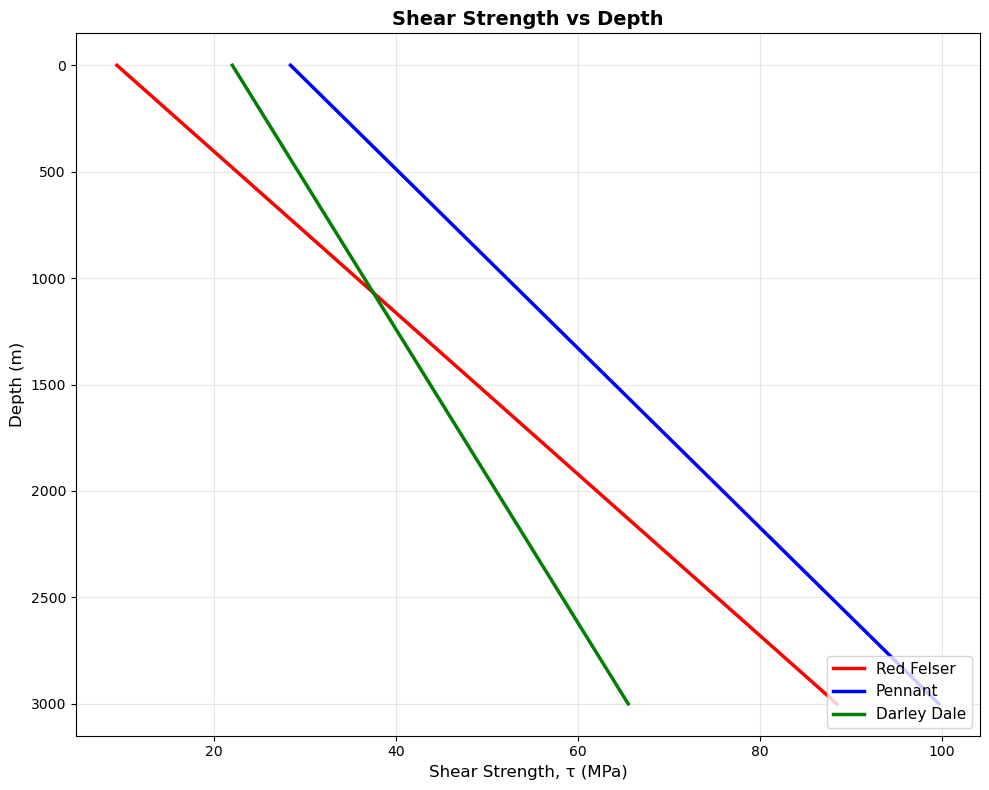

In [ ]:
#Shear Strength vs Depth Calculation

# Parameters
depth = np.linspace(0, 3000, 100)
g = 9.81

# Calculate and plot shear strength vs depth
plt.figure(figsize=(10, 8))

for name, props in rock_data.items():
    C = props['C']
    phi = np.radians(props['phi'])
    rho = props['rho']
    
    sigma_n = rho * g * depth / 1e6
    tau = C + sigma_n * np.tan(phi)
    
    plt.plot(tau, depth, linewidth=2.5, label=name, color=props['color'])

plt.xlabel('Shear Strength, τ (MPa)', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)
plt.title('Shear Strength vs Depth', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='lower right')
plt.tight_layout()
plt.show()

#### Interpretation

The plot shows shear strength increasing linearly with depth for three sandstones:

- **Red Felser**: Highest friction angle (52.01°) gives steepest gradient
- **Pennant**: Highest surface strength due to high cohesion (28.40 MPa)  
- **Darley Dale**: Lower friction angle (32.62°) due to higher porosity (13.5%)

At surface (z=0), shear strength equals cohesion (C). Red Felser overtakes others at greater depths due to highest friction angle.